In [ ]:
! pip install gdown

[https://drive.google.com/file/d/1q8sCmQ16_-OuwNUluUZBM3AprsGGvCT7/view?usp=share_link](http://)

https://drive.google.com/file/d/1e38MH0RnPpIRIMY1lsUe_86k4I3IAvNk/view?usp=share_link

https://drive.google.com/file/d/1C7Jp3M89I2KLhO7zq5ieaGWGujWvImjR/view?usp=share_link

In [ ]:
! gdown 1C7Jp3M89I2KLhO7zq5ieaGWGujWvImjR

In [ ]:
! unzip -q Training.zip

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip = True,
        validation_split=0.2,)
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2,
)

training_set = train_datagen.flow_from_directory(
        "Training_01/",
        target_size=(224, 224),
        batch_size=512,
        class_mode='categorical',
        subset='training')

test_set = test_datagen.flow_from_directory(
        "Training_01/",
        target_size=(224, 224),
        batch_size=512,
        class_mode='categorical',
        subset='validation')


Found 38098 images belonging to 204 classes.
Found 9436 images belonging to 204 classes.


In [2]:
'''############ Creating lookup table for all faces ############'''
# class_indices have the numeric tag for each face
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

# Saving the face map for future reference
import pickle
with open("ResultsMap_04.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)

# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
# print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)


 The Number of output neurons:  204


In [3]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [4]:
model = Sequential()

model.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), padding = 'same', input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), padding = 'same',activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Convolution2D(128, kernel_size=(5, 5), strides=(1, 1),padding = 'same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Convolution2D(256, kernel_size=(3, 3), strides=(1, 1), padding = 'same',activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Convolution2D(512, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(OutputNeurons, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [5]:
history = model.fit(training_set, epochs=75, validation_data=test_set, workers = 8).history

Epoch 1/75
75/75 [==============================] - 425s 5s/step - loss: 5.2882 - accuracy: 0.0083 - val_loss: 5.2320 - val_accuracy: 0.0097
Epoch 2/75
75/75 [==============================] - 440s 5s/step - loss: 5.2217 - accuracy: 0.0102 - val_loss: 5.1811 - val_accuracy: 0.0107
Epoch 3/75
75/75 [==============================] - 404s 5s/step - loss: 5.1799 - accuracy: 0.0125 - val_loss: 5.0868 - val_accuracy: 0.0261
Epoch 4/75
75/75 [==============================] - 402s 5s/step - loss: 5.0318 - accuracy: 0.0257 - val_loss: 4.6976 - val_accuracy: 0.0422
Epoch 5/75
75/75 [==============================] - 405s 5s/step - loss: 4.6534 - accuracy: 0.0420 - val_loss: 4.2750 - val_accuracy: 0.0703
Epoch 6/75
75/75 [==============================] - 404s 5s/step - loss: 4.2880 - accuracy: 0.0658 - val_loss: 3.6343 - val_accuracy: 0.1341
Epoch 7/75
75/75 [==============================] - 433s 5s/step - loss: 3.9016 - accuracy: 0.1045 - val_loss: 3.2042 - val_accuracy: 0.1948
Epoch 8/75
75

In [12]:
model.save('Face_Reco_04.h5')

In [7]:
from IPython.display import FileLink 
FileLink(r'Face_Reco_04.h5')

/kaggle/working/Face_Reco_04.h5

In [ ]:
# '''########### Making single predictions ###########'''
# import numpy as np
# from tensorflow.keras.preprocessing import image

# ImagePath='Images/Screenshot from 2023-04-15 11-29-18.png'
# test_image=image.load_img(ImagePath,target_size=(224, 224))
# test_image=image.img_to_array(test_image)

# test_image=np.expand_dims(test_image,axis=0)

# result=model.predict(test_image,verbose=0)
# #print(training_set.class_indices)

# print('Prediction is: ',ResultMap[np.argmax(result)])

In [ ]:
# print(classification_report(y_test, y_pred))

In [ ]:
# from sklearn.metrics import confusion_matrix

# import seaborn as sns
# import matplotlib.pyplot as plt
# y_pred = model.predict(x_test)

# conf_mat = confusion_matrix(y_test, y_pred)

# sns.heatmap(conf_mat, annot=True, linewidths=4, linecolor='blue')
# plt.show()

In [ ]:
# from keras.models import load_model

# model = load_model("Face_Reco_03.h5")
# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# history = model.fit(training_set, epochs=3, validation_data=test_set, workers = 64).history

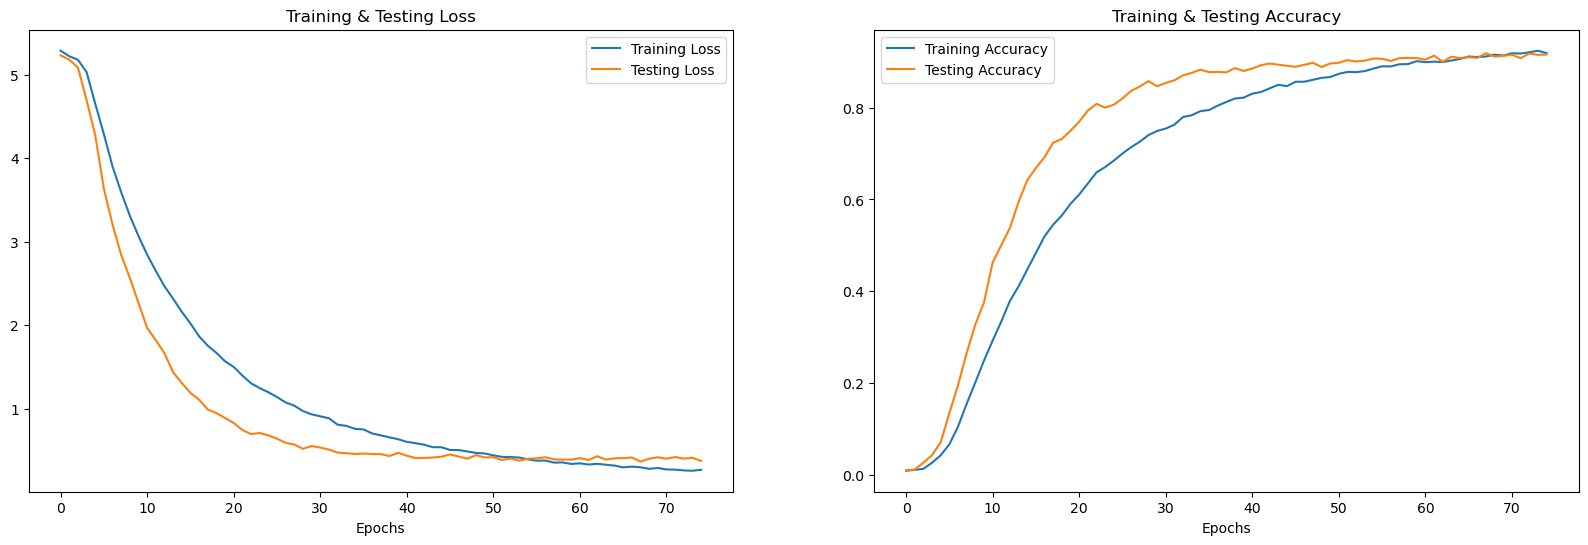

In [11]:
import matplotlib.pyplot as plt
epochs = [i for i in range(75)]
fig , ax = plt.subplots(1,2)
train_acc = history['accuracy']
train_loss = history['loss']
test_acc = history['val_accuracy']
test_loss = history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()